In [120]:
import pandas as pd
import numpy as np
import time
import datetime
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore')

In [121]:
year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016' ,'2017', '2018']
gen = ['M', 'W']

In [122]:
temp = pd.read_excel('olympic_weather.xlsx', sheet_name='chicago_marathon')
del temp['date']

In [123]:
df = pd.DataFrame()
for y in year:
    for g in gen:
        file = pd.read_csv('chicago_marathon/' + y + '_' + g +'.csv')
        file = file[:500]
        df = pd.concat([df, file])

In [124]:
df = df.reset_index()

In [125]:
df.head(5)

,index,Unnamed: 0,year,gender,place,place_gender,name,city,bib,division,half,finish
0,0,0,2010,M,1,1,"Wanjiru, Sammy (KEN)",NaN,1,20-24,1:02:37,2:06:24
1,1,1,2010,M,3,3,"Lilesa, Feyisa (ETH)",NaN,4,20-24,1:02:37,2:08:10
2,2,2,2010,M,5,5,"Kipruto, Vincent (KEN)",NaN,2,20-24,1:02:37,2:09:08
3,3,3,2010,M,7,7,"Moiben, Laban (KEN)","Kennesaw, GA",9,25-29,1:02:37,2:10:48
4,4,4,2010,M,9,9,"Harroufi, Ridouane (MAR)",NaN,10,25-29,1:05:11,2:13:01


In [126]:
for i in range(len(df)):
    if df.loc[i, 'finish'] != 'None':
        df.loc[i, 'finish'] = datetime.datetime.strptime(df.loc[i, 'finish'], '%H:%M:%S')

In [127]:
del df['Unnamed: 0']
del df['index']

In [128]:
df["finish"] = df["finish"].values.astype('datetime64[ns]')

In [129]:
df_men = df[df['gender']=='M']
df_women = df[df['gender']=='W']

In [130]:
df =df.astype({'year':'int64'})

In [131]:
gold_records = []
top10_records = []
avg_time = []
std_time = []

for y in year:
    df_re = df_men[df_men['year']==int(y)].reset_index()
    
    gold_rec = df_re[df_re['place_gender']==1]['finish'][0].time()
    gold_records.append(gold_rec)
    
    top10_rec = df_re.iloc[:10]['finish'].mean().time()
    top10_records.append(top10_rec)
    
    avg_time.append(df_re['finish'].mean().time())
    #std_time.append(np.std(df_re['finish']))
    
#df_men_records = pd.DataFrame({'year' : year, 'gold_records':gold_records, 'top10_records':top10_records, 'avg_time': avg_time,  'std_time':std_time })
df_men_records = pd.DataFrame({'year' : year, 'gold_records':gold_records, 'top10_records':top10_records, 'avg_time': avg_time})

In [132]:
for i in range(len(df_men_records)):
    minute = df_men_records.loc[i, 'avg_time'].hour * 60 + df_men_records.loc[i, 'avg_time'].minute
    df_men_records.loc[i, 'avg_minute'] = minute

'''
for i in range(len(df_men_records)):
    df_men_records.loc[i, 'std_seconds'] = df_men_records.loc[i, 'std_time'].seconds
'''
    
for i in range(len(df_men_records)):
    sec = df_men_records.loc[i, 'gold_records'].hour * 60  + df_men_records.loc[i, 'gold_records'].minute 
    df_men_records.loc[i, 'gold_records_re'] = sec
    
    sec_top10 = df_men_records.loc[i, 'top10_records'].hour * 60  + df_men_records.loc[i, 'top10_records'].minute 
    df_men_records.loc[i, 'top10_records_re'] = sec_top10
    

In [133]:
df_men_records =df_men_records.astype({'year':'int64'})

In [134]:
df_men_records_re = pd.merge(df_men_records, temp, how='left', on='year')

In [135]:
df_men_records_re = df_men_records_re[['year', 'temp(Celcius)', 'wind(km/h)', 'humidity(%)', 'gold_records_re', 'top10_records_re', 'avg_minute', ]]

In [136]:
df_men_records_re

,year,temp(Celcius),wind(km/h),humidity(%),gold_records_re,top10_records_re,avg_minute
0,2010,18,7,61,126.0,133.0,173.0
1,2011,18,0,61,125.0,134.0,173.0
2,2012,6,17,56,124.0,129.0,171.0
3,2013,12,15,59,123.0,131.0,171.0
4,2014,17,7,93,124.0,131.0,169.0
5,2015,12,19,69,129.0,134.0,170.0
6,2016,12,13,72,131.0,136.0,171.0
7,2017,16,6,83,129.0,131.0,164.0
8,2018,15,17,90,125.0,126.0,159.0


In [137]:
df_men_records_re = df_men_records_re.rename(columns= {'temp(Celcius)':'기온', 'wind(km/h)':'바람', 'humidity(%)':'습도', 'gold_records_re':'금메달_기록', 
                                              'top10_records_re':'상위10위_평균_기록', 'avg_minute':'상위500위_평균_기록'})

In [138]:
df_men_records_re['마라톤'] = 'chicago'
df_men_records_re['성별'] = 'men'

In [139]:
df_men_records_re = df_men_records_re[['마라톤', 'year', '기온', '바람', '습도', '성별', '금메달_기록', '상위10위_평균_기록', '상위500위_평균_기록' ]]

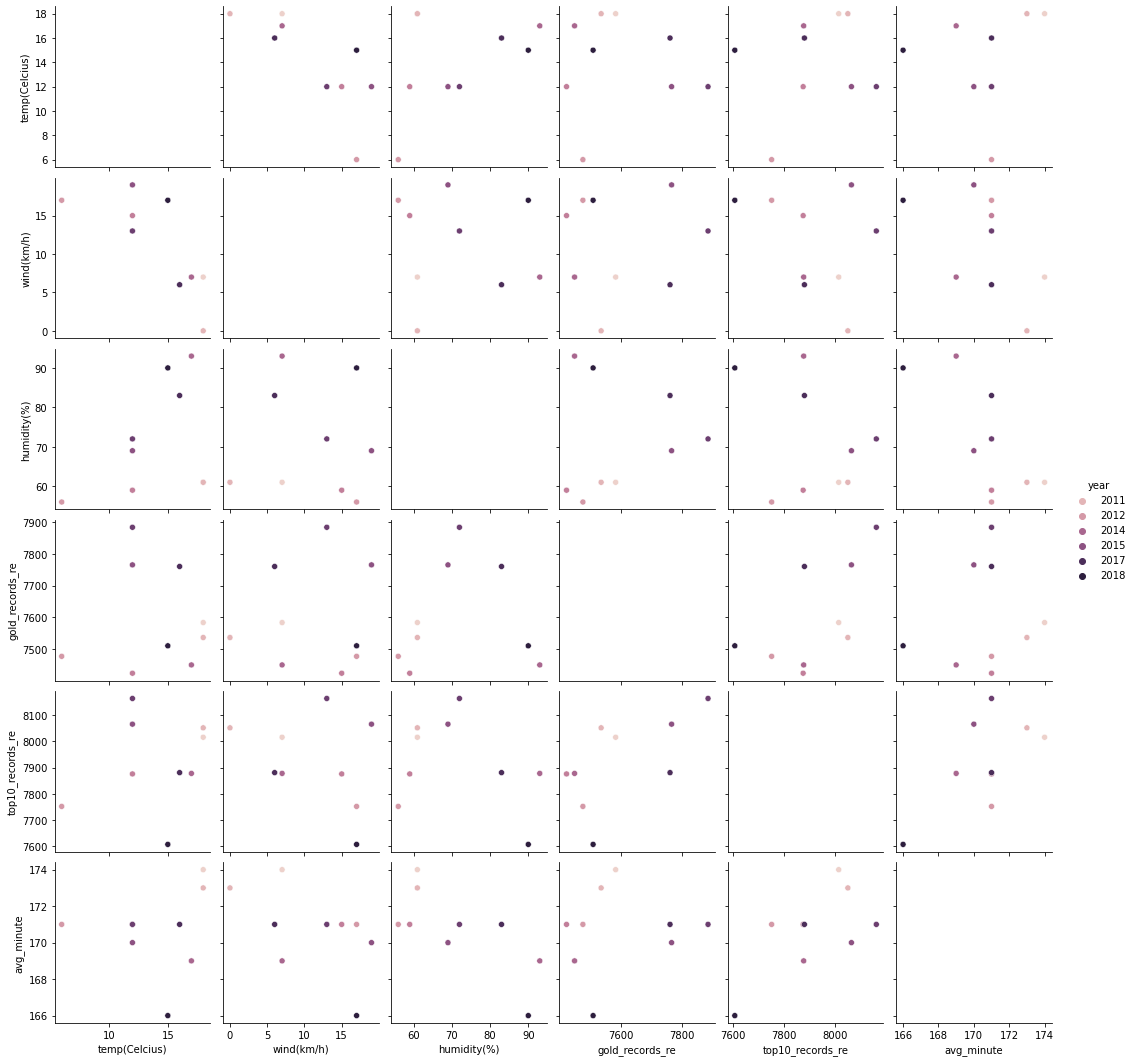

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_men_records_re, hue="year")
plt.show()

In [50]:
df_women

,year,gender,place,place_gender,name,city,bib,division,half,finish


In [140]:
gold_records = []
top10_records = []
avg_time = []
std_time = []

for y in year:
    df_re = df_women[df_women['year']==int(y)].reset_index()
    
    gold_rec = df_re[df_re['place_gender']==1]['finish'][0].time()
    gold_records.append(gold_rec)
    
    top10_rec = df_re.iloc[:10]['finish'].mean().time()
    top10_records.append(top10_rec)
    
    avg_time.append(df_re['finish'].mean().time())
    
    
df_women_records = pd.DataFrame({'year' : year, 'gold_records':gold_records, 'top10_records':top10_records, 'avg_time': avg_time, })

In [141]:
for i in range(len(df_women_records)):
    minute = df_women_records.loc[i, 'avg_time'].hour * 60 + df_women_records.loc[i, 'avg_time'].minute
    df_women_records.loc[i, 'avg_minute'] = minute
   
    
for i in range(len(df_women_records)):
    sec = df_women_records.loc[i, 'gold_records'].hour * 60  + df_women_records.loc[i, 'gold_records'].minute 
    df_women_records.loc[i, 'gold_records_re'] = sec
    
    sec_top10 = df_women_records.loc[i, 'top10_records'].hour * 60  + df_women_records.loc[i, 'top10_records'].minute 
    df_women_records.loc[i, 'top10_records_re'] = sec_top10
    

In [142]:
df_women_records =df_women_records.astype({'year':'int64'})

In [143]:
df_women_records_re = pd.merge(df_women_records, temp, how='left', on='year')

In [144]:
df_women_records_re = df_women_records_re[['year', 'temp(Celcius)', 'wind(km/h)', 'humidity(%)', 'gold_records_re', 'top10_records_re', 'avg_minute', ]]

In [145]:
df_women_records_re = df_women_records_re.rename(columns= {'temp(Celcius)':'기온', 'wind(km/h)':'바람', 'humidity(%)':'습도', 'gold_records_re':'금메달_기록', 
                                              'top10_records_re':'상위10위_평균_기록', 'avg_minute':'상위500위_평균_기록'})

In [146]:
df_women_records_re['마라톤'] = 'chicago'
df_women_records_re['성별'] = 'women'

In [147]:
df_women_records_re = df_women_records_re[['마라톤', 'year', '기온', '바람', '습도', '성별', '금메달_기록', '상위10위_평균_기록', '상위500위_평균_기록' ]]

In [148]:
df_chicago = pd.concat([df_men_records_re, df_women_records_re]).reset_index()
del df_chicago['index']
df_chicago.to_csv('chicago_marathon_yearly.csv', encoding='utf-8-sig')

In [149]:
df_chicago

,마라톤,year,기온,바람,습도,성별,금메달_기록,상위10위_평균_기록,상위500위_평균_기록
0,chicago,2010,18,7,61,men,126.0,133.0,173.0
1,chicago,2011,18,0,61,men,125.0,134.0,173.0
2,chicago,2012,6,17,56,men,124.0,129.0,171.0
3,chicago,2013,12,15,59,men,123.0,131.0,171.0
4,chicago,2014,17,7,93,men,124.0,131.0,169.0
5,chicago,2015,12,19,69,men,129.0,134.0,170.0
6,chicago,2016,12,13,72,men,131.0,136.0,171.0
7,chicago,2017,16,6,83,men,129.0,131.0,164.0
8,chicago,2018,15,17,90,men,125.0,126.0,159.0
9,chicago,2010,18,7,61,women,143.0,151.0,205.0


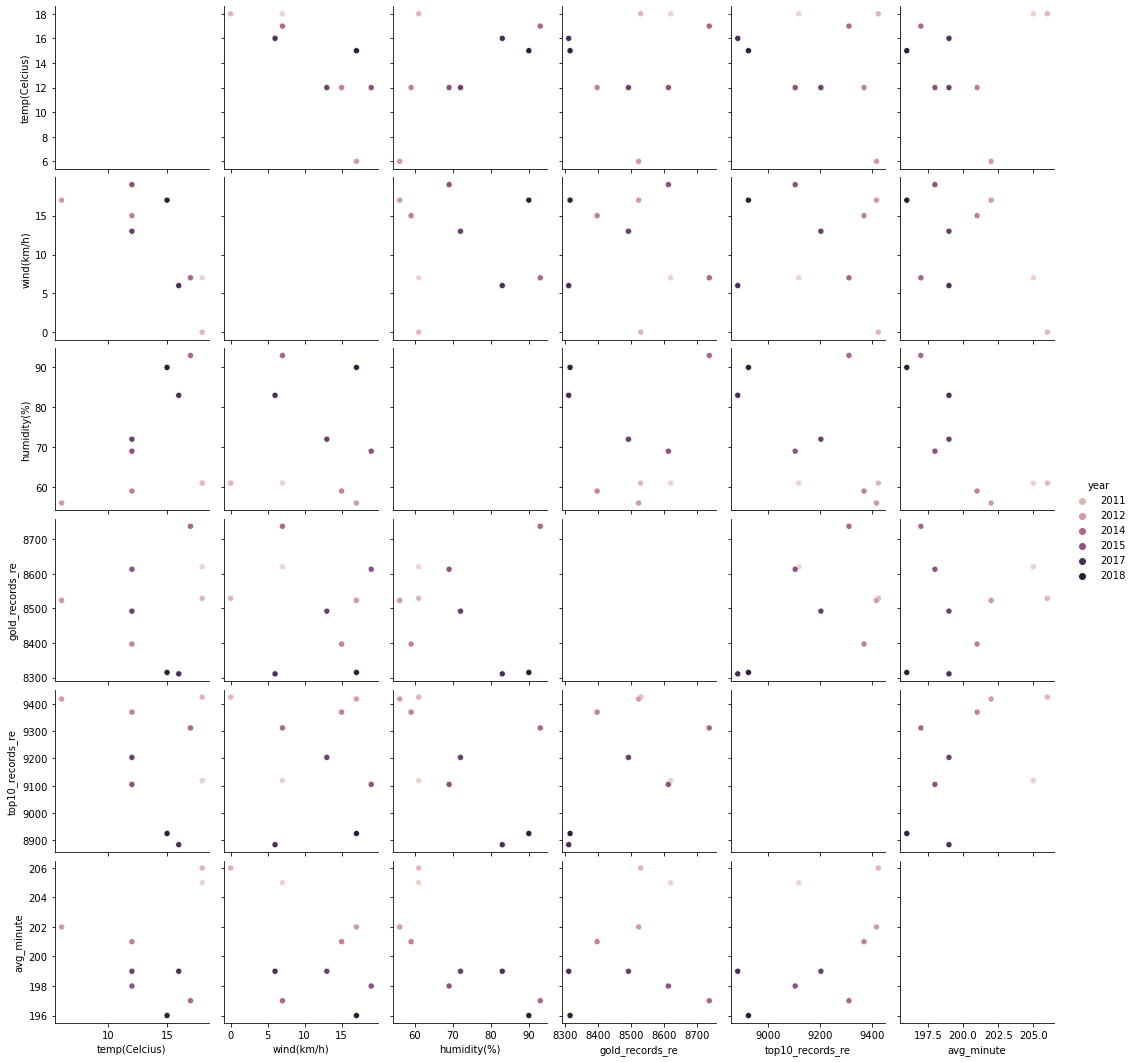

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_women_records_re, hue="year")
plt.show()